Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
💰 Faturamento Total por Loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58

Quantidade de Produtos Vendidos por Categoria:
{'Loja 1': Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
dtype: int64, 'Loja 2': Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
dtype: int64, 'Loja 3': Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer         

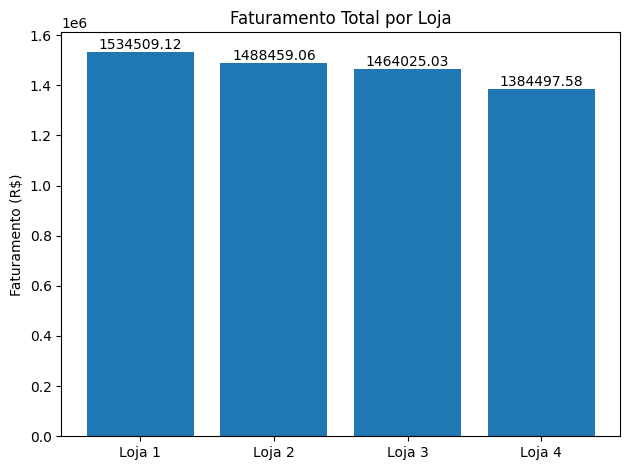

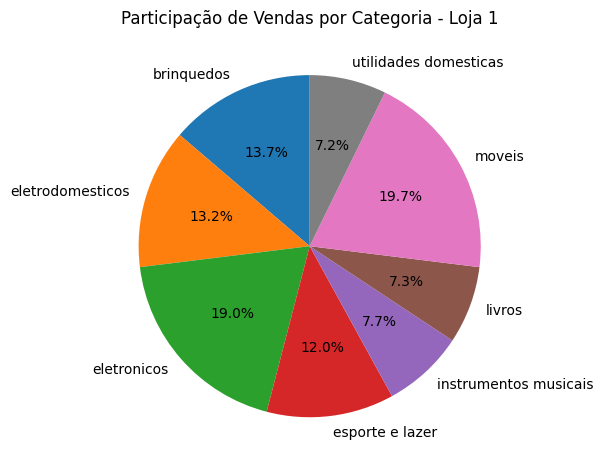

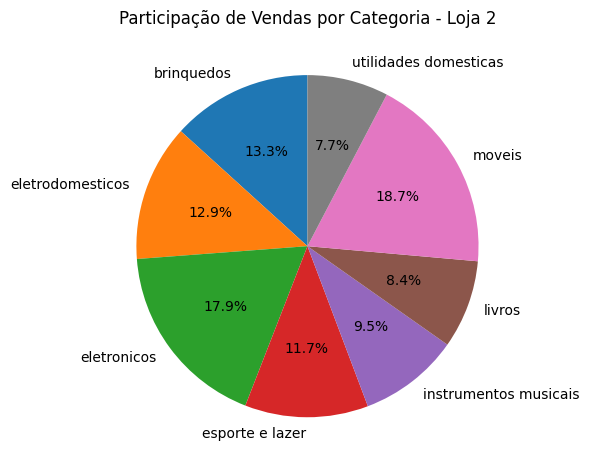

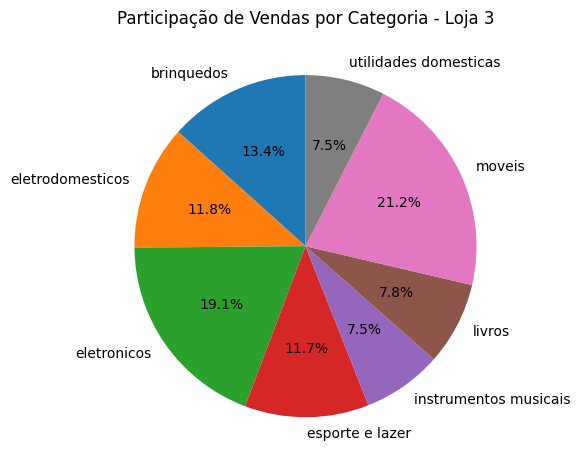

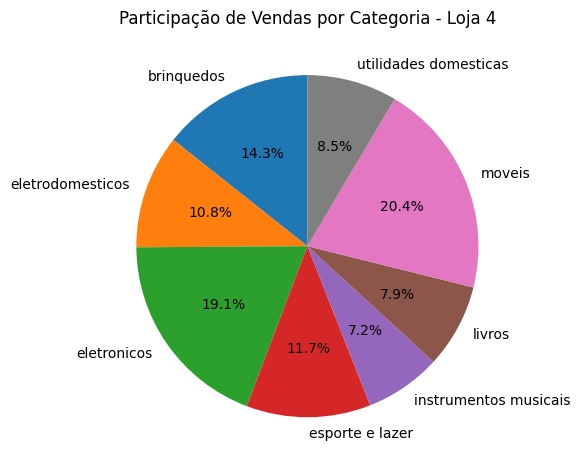

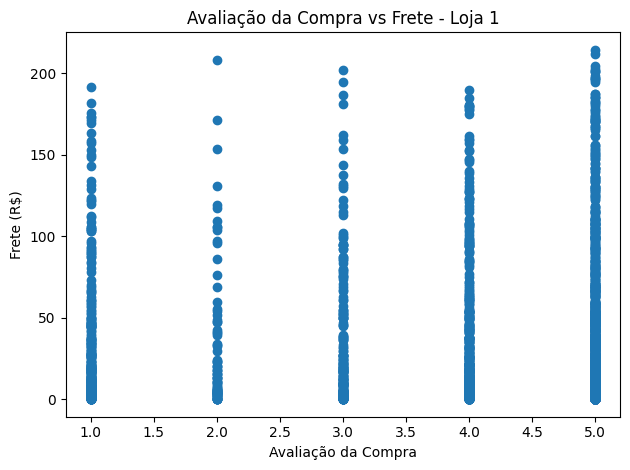

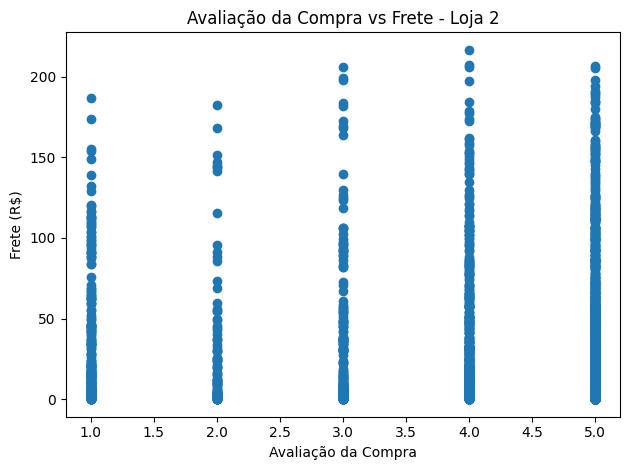

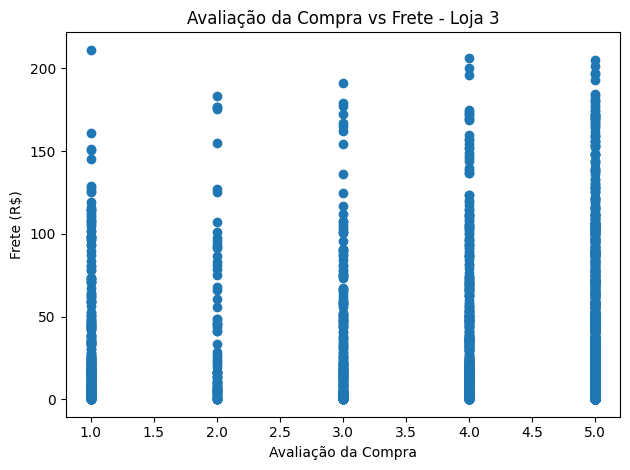

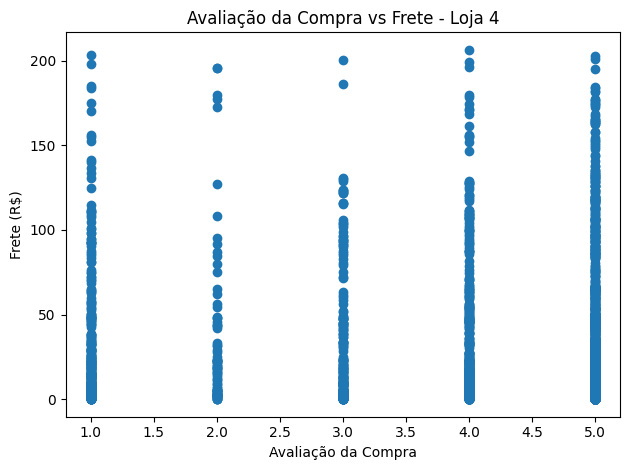

In [25]:
# 📊 Análise de Desempenho de Lojas por Thiago Pimentel - Challenge Alura Store

# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Carregando Drive
drive.mount('/content/drive')
caminho_base = '/content/drive/MyDrive/Colab/Projeto1/'

# Lendo os dados das lojas
loja_1 = pd.read_csv(caminho_base + 'loja_1.csv')
loja_2 = pd.read_csv(caminho_base + 'loja_2.csv')
loja_3 = pd.read_csv(caminho_base + 'loja_3.csv')
loja_4 = pd.read_csv(caminho_base + 'loja_4.csv')

# Criando dicionário com todas as lojas
lojas = {'Loja 1': loja_1, 'Loja 2': loja_2, 'Loja 3': loja_3, 'Loja 4': loja_4}

# Faturamento total de cada loja
faturamento_total = {}

def faturamento_por_loja(loja):
    return loja['Preço'].sum()

for loja, dados in lojas.items():
    faturamento_total[loja] = faturamento_por_loja(dados)

print("💰 Faturamento Total por Loja:")
for loja, valor in faturamento_total.items():
    print(f"{loja}: R$ {valor:,.2f}")

# Quantidade de produtos vendidos por categoria
def qtde_produtos_por_loja(dados_loja):
    """Retorna a contagem de produtos por categoria para uma loja."""
    if dados_loja.empty:
        return pd.Series(dtype=int)
    return dados_loja.groupby('Categoria do Produto').size()

for loja, dados in lojas.items():
    qtde_total_produtos_vendidos[loja] = qtde_produtos_por_loja(dados)

print("\nQuantidade de Produtos Vendidos por Categoria:")
print(qtde_total_produtos_vendidos)

# Média de avaliação por loja
media_avaliacao = {}

def media_avaliacao_por_loja(loja):
    return loja['Avaliação da compra'].mean().round(3)

for loja, dados in lojas.items():
    media_avaliacao[loja] = media_avaliacao_por_loja(dados)

print("\n⭐ Média de Avaliação por Loja:")
for loja, media in media_avaliacao.items():
    print(f"{loja}: {media}")

# Produtos mais vendidos por loja

produtos_mais_vendidos = {loja: f"{dados.sort_values(ascending=False).index[0]} ({dados.max()})"
                          for loja, dados in qtde_total_produtos_vendidos.items()}

print("\nProdutos Mais Vendidos por Loja:")
print(produtos_mais_vendidos)

# Produtos menos vendidos por loja

produtos_menos_vendidos = {loja: f"{dados.sort_values().index[0]} ({dados.min()})"
                           for loja, dados in qtde_total_produtos_vendidos.items()}

print("\nProdutos Menos Vendidos por Loja:")
print(produtos_menos_vendidos)

# Frete médio por loja
frete_medio = {}

def frete_medio_por_loja(loja):
    return loja['Frete'].mean().round(2)

for loja, dados in lojas.items():
    frete_medio[loja] = frete_medio_por_loja(dados)

print("\n🚚 Frete Médio por Loja:")
for loja, frete in frete_medio.items():
    print(f"{loja}: R$ {frete}")

# Gráfico de barra: faturamento total
def grafico_bar(loja, valores):
    grafico = plt.bar(loja, valores)
    plt.bar_label(grafico, fmt='%.2f')
    plt.title('Faturamento Total por Loja')
    plt.ylabel('Faturamento (R$)')
    plt.tight_layout()
    plt.show()

grafico_bar(faturamento_total.keys(), faturamento_total.values())

# Gráfico de pizza: participação de vendas por categoria
def grafico_pizza(loja, dados):
    plt.pie(dados, labels=dados.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Participação de Vendas por Categoria - {loja}')
    plt.tight_layout()
    plt.show()

for loja, dados in qtde_total_produtos_vendidos.items():
    grafico_pizza(loja, dados)

# Gráfico de dispersão: Avaliação x Frete
def grafico_scat(loja, dados):
    plt.scatter(dados['Avaliação da compra'], dados['Frete'])
    plt.title(f'Avaliação da Compra vs Frete - {loja}')
    plt.xlabel('Avaliação da Compra')
    plt.ylabel('Frete (R$)')
    plt.tight_layout()
    plt.show()

for loja, dados in lojas.items():
    grafico_scat(loja, dados)